In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn-deep')
import seaborn as sns
import warnings
def ignore_warn(*args,**kwargs):
    pass

warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm,skew
pd.set_option('display.float_format',lambda x:'{:.3f}'.format(x))

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
display(train.head(5))
print(len(train),'train samples')
print(len(test),'test samples')
print('The shape of train is {}'.format(train.shape))
print('The shape of test is {}'.format(test.shape))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


1460 train samples
1459 test samples
The shape of train is (1460, 81)
The shape of test is (1459, 80)


In [3]:
train_ID = train['Id']
test_ID = test['Id']

train.drop(columns=['Id'],axis=1,inplace=True)
test.drop(columns=['Id'],axis=1,inplace=True)

print('\nThe train data size after dropping Id feature is : {}'.format(train.shape))
print('\nThe test data size after dropping Id feature is : {}'.format(test.shape))


The train data size after dropping Id feature is : (1460, 80)

The test data size after dropping Id feature is : (1459, 79)


### Data Processing

### Outliters

<Figure size 720x504 with 0 Axes>

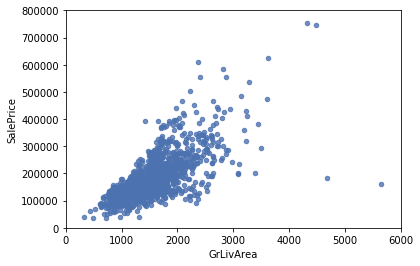

In [4]:
plt.figure(figsize=(10,7))
train.plot(kind='scatter',x='GrLivArea',y='SalePrice',alpha=0.8)
plt.axis([0,6000,0,800000])
plt.show()

<Figure size 720x504 with 0 Axes>

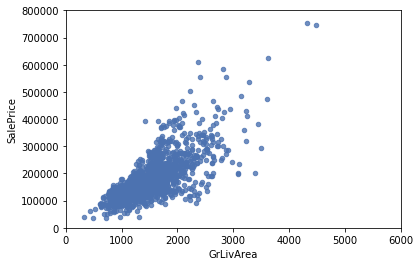

In [5]:
train = train.drop(train[(train['GrLivArea']>4000) &
                         (train['SalePrice'] < 300000)].index)
plt.figure(figsize=(10,7))
train.plot(kind='scatter',x='GrLivArea',y='SalePrice',alpha=0.8)
plt.axis([0,6000,0,800000])
plt.show()

## Target Variable


 mu = 180932.92 and sigma = 79467.79



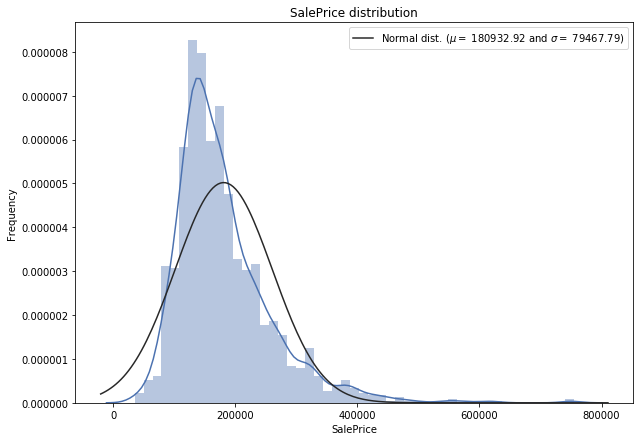

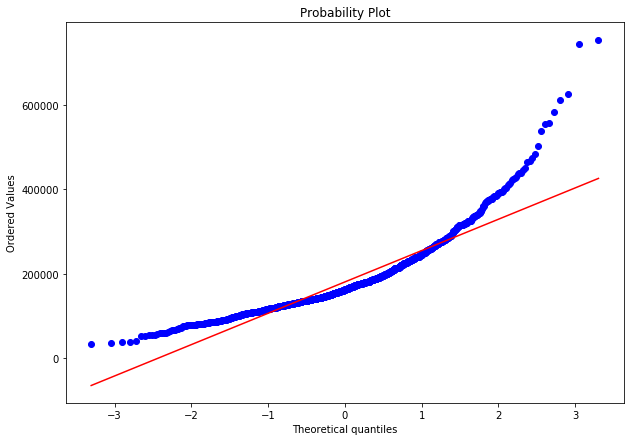

In [6]:
plt.figure(figsize=(10,7))
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu,sigma))

plt.legend(['Normal dist. ($\mu =$ {:.2f} and $\sigma =$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.figure(figsize=(10,7))
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

### log-transformation of the target variable


 mu = 12.02 and sigma = 0.40


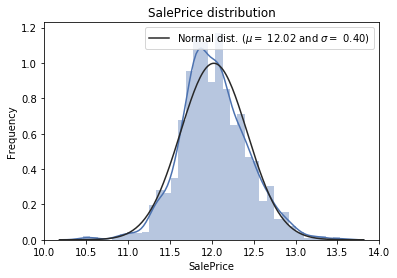

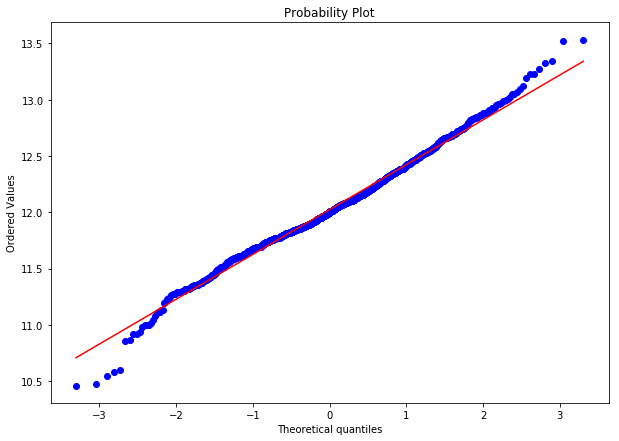

In [7]:
train['SalePrice'] = np.log1p(train['SalePrice'])

sns.distplot(train['SalePrice'],fit=norm)

(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.figure(figsize=(10,7))
stats.probplot(train['SalePrice'],plot=plt)
plt.show()

## Feature engineering

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['SalePrice'].values
target = train['SalePrice'].values
all_data = pd.concat([train,test]).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)
print('all_data size is : {}'.format(all_data.shape))

all_data size is : (2917, 79)


### Missing Data

In [9]:
all_data_na = (all_data.isnull().sum(axis=0)/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
display(missing_data.head(20))

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


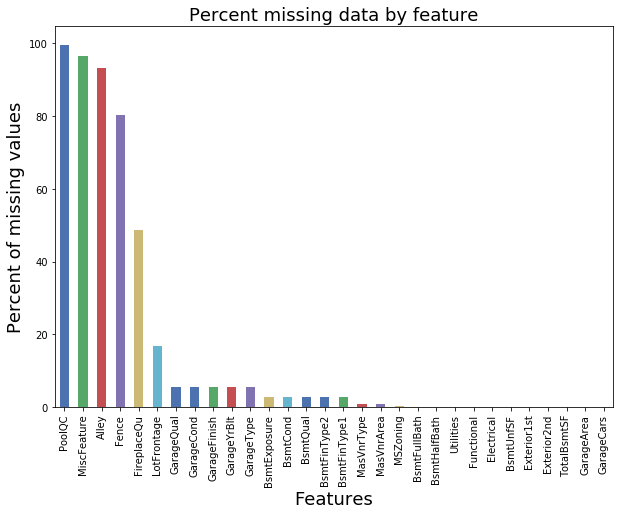

In [10]:
plt.figure(figsize=(10,7))
all_data_na.plot(kind='bar')
plt.xlabel('Features',fontsize=18)
plt.ylabel('Percent of missing values',fontsize=18)
plt.xticks(rotation=90)
plt.title('Percent missing data by feature',fontsize=18)
plt.show()

## Data Correlation

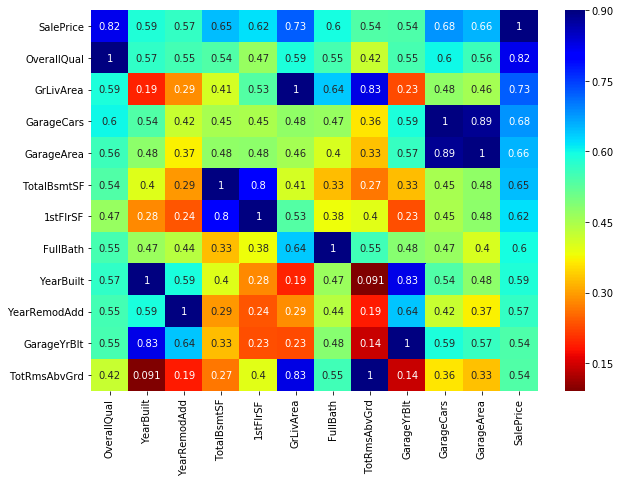

In [11]:
all_corrmat = train.corr()
main_feature = all_corrmat[abs(all_corrmat['SalePrice'])>0.5].index
main_corrmat = train[main_feature].corr().sort_values(by='SalePrice',ascending=False)
plt.figure(figsize=(10,7))
sns.heatmap(data = main_corrmat,vmax=0.9,cbar=True,cmap=plt.cm.jet_r,square=False,annot=True)
plt.show()

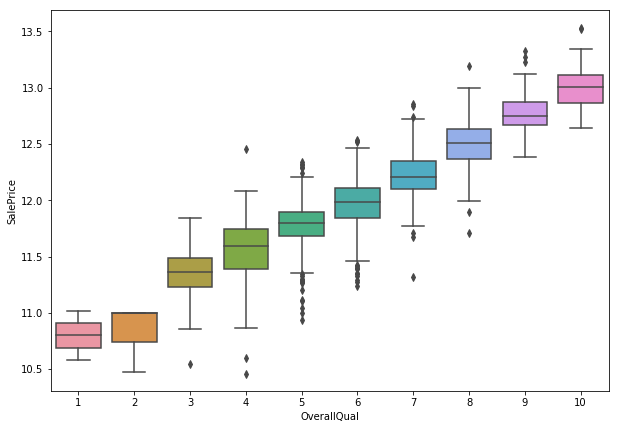

In [12]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train,x='OverallQual',y='SalePrice')
plt.show()

### Imputing missing values

- **PoolQC**:data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.
- Ex   Excellent
- Gd   Good
- TA   Average/Typical
- Fa   Fair
-  NA   No Pool

In [13]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

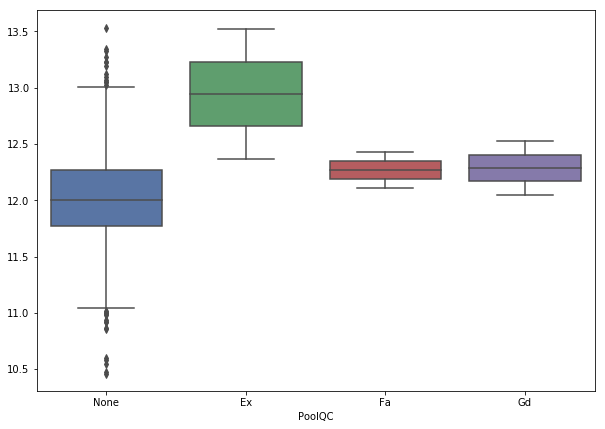

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(x=all_data.loc[train_ID]['PoolQC'],y=y_train)
plt.show()

In [15]:
display(all_data['PoolQC'].value_counts())

None    2908
Ex         4
Gd         3
Fa         2
Name: PoolQC, dtype: int64

- **MiscFeature** : data description says NA means "no misc feature"

In [16]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

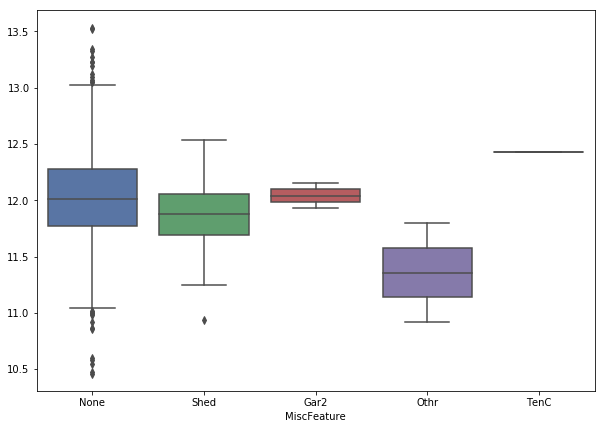

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x=all_data.loc[train_ID]['MiscFeature'],y=y_train)
plt.show()

In [18]:
display(all_data['MiscFeature'].value_counts())

None    2812
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

- **Alley** : data description says NA means "no alley access"

In [19]:
all_data['Alley'] = all_data['Alley'].fillna('None')

- **Fence** : data description says NA means "no fence"

In [20]:
all_data["Fence"] = all_data["Fence"].fillna("None")

- **FireplaceQu** : data description says NA means "no fireplace"

In [21]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

- **LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood**.

In [22]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

- **GarageType, GarageFinish, GarageQual and GarageCond **: Replacing missing data with None

In [23]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_data[col] = all_data[col].fillna('None')

- **GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

In [24]:
all_data['GarageYrBlt'][all_data['GarageYrBlt'].isna()] = all_data['YearBuilt'][all_data['GarageYrBlt'].isna()]
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    all_data[col] = all_data[col].fillna(all_data[col].median())

- **BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

In [25]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    all_data[col] = all_data[col].fillna(all_data[col].median())

- **BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no basement.

In [26]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2']:
    all_data[col] = all_data[col].fillna('None')

- **MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.

In [27]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].median())
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

- **MSZoning (The general zoning classification)** : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [28]:
display(all_data['MSZoning'].value_counts())

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [29]:
display(all_data['MSZoning'].mode())

0    RL
dtype: object

In [30]:
all_data['MSZoning'] = all_data.groupby('Neighborhood')['MSZoning'].transform(lambda x:x.fillna(x.mode()[0]))

- **Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [31]:
display(all_data['Utilities'].value_counts())

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [32]:
all_data = all_data.drop(['Utilities'],axis=1)

- **Functional** : data description says NA means typical

In [33]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

- **Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

In [34]:
all_data['Electrical'] = all_data.groupby('Neighborhood')['Electrical'].transform(lambda x:x.fillna(x.mode()[0]))

- **KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.

In [35]:
all_data['KitchenQual'] = all_data.groupby('Neighborhood')['KitchenQual'].transform(lambda x:x.fillna(x.mode()[0]))

- **Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

In [36]:
for col in ['Exterior1st','Exterior2nd']:
    all_data[col] = all_data.groupby('Neighborhood')[col].transform(lambda x:x.fillna(x.mode()[0]))

- **SaleType** : Fill in again with most frequent which is "WD"

In [37]:
all_data['SaleType'] = all_data.groupby('Neighborhood')['SaleType'].transform(lambda x:x.fillna(x.mode()[0]))

- **MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [38]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna('None')

In [39]:
# Check remaining missing values of any
all_data_na = (all_data.isnull().sum(axis=1)/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio':all_data_na})
print(missing_data.head(10))

Empty DataFrame
Columns: [Missing Ratio]
Index: []


### More feature engineering

Transforming some numerical variables that are really categorical

In [40]:
for col in ['MSSubClass','OverallCond','YrSold','MoSold']:
    all_data[col] = all_data[col].astype(str)

### Label Encoding some categorical variables that may contain information in their ordering set

In [41]:
from sklearn.preprocessing import LabelEncoder
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

for col in cols:
    lbl = LabelEncoder()
    all_data[col] = lbl.fit_transform(all_data[col])

print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


#### Adding one more important feature

Since area related features are very important to determine house prices, we add one more feature which is the total area of basement, first and second floor areas of each house

In [42]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Skewed features

In [43]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
print(numeric_feats)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF'],
      dtype='object')


In [44]:
skewed_feats = all_data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)
print('\nSkew in numerical features :\n')
skewness = pd.DataFrame({'Skew':skewed_feats})
skewness.head(10)


Skew in numerical features :



,Skew
MiscVal,21.940
PoolArea,17.689
LotArea,13.109
LowQualFinSF,12.085
3SsnPorch,11.372
LandSlope,4.973
KitchenAbvGr,4.301
BsmtFinSF2,4.145
EnclosedPorch,4.002
ScreenPorch,3.945


### Box Cox Transformation of (highly) skewed features

We use the scipy function boxcox1p which computes the Box-Cox transformation of  1+x .

Note that setting  λ=0  is equivalent to log1p used above for the target variable.

See this page for more details on Box Cox Transformation as well as the scipy function's page<https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html>.

In [45]:
skewness = skewness[abs(skewness) >= 0.75]
print('There are {} skewed numerical features to Box Cox transform'.format(skewness.shape[0]))

There are 59 skewed numerical features to Box Cox transform


In [46]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat],lam)

In [47]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null float64
2ndFlrSF         2917 non-null float64
3SsnPorch        2917 non-null float64
Alley            2917 non-null float64
BedroomAbvGr     2917 non-null float64
BldgType         2917 non-null object
BsmtCond         2917 non-null float64
BsmtExposure     2917 non-null float64
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null float64
BsmtFinType2     2917 non-null float64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null float64
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null float64
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null float64
ExterCond        2917 non-null float64
ExterQual        2917 non-null float64


### Getting dummy categorical features

In [48]:
categorical_feats = all_data.dtypes[all_data.dtypes == 'object'].index
print(categorical_feats)
print(all_data[categorical_feats].head(2))

Index(['BldgType', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st',
       'Exterior2nd', 'Foundation', 'GarageType', 'Heating', 'HouseStyle',
       'LandContour', 'LotConfig', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType'],
      dtype='object')
  BldgType Condition1 Condition2 Electrical Exterior1st Exterior2nd  \
0     1Fam       Norm       Norm      SBrkr     VinylSd     VinylSd   
1     1Fam      Feedr       Norm      SBrkr     MetalSd     MetalSd   

  Foundation GarageType Heating HouseStyle LandContour LotConfig MSZoning  \
0      PConc     Attchd    GasA     2Story         Lvl    Inside       RL   
1     CBlock     Attchd    GasA     1Story         Lvl       FR2       RL   

  MasVnrType MiscFeature Neighborhood RoofMatl RoofStyle SaleCondition  \
0    BrkFace        None      CollgCr  CompShg     Gable        Normal   
1       None        None      Veenker  CompShg     Gable        Normal   

  Sa

In [49]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


In [50]:
from sklearn.preprocessing import RobustScaler
scaler_X = RobustScaler()
scaler_values = scaler_X.fit_transform(all_data)
all_data = pd.DataFrame(data=scaler_values,columns=all_data.columns)
print(np.max(all_data,axis=0))
print(np.min(all_data,axis=0))

1stFlrSF                 3.805
2ndFlrSF                 1.280
3SsnPorch               10.313
Alley                    0.464
BedroomAbvGr             3.063
BsmtCond                 0.000
BsmtExposure             0.806
BsmtFinSF1               0.618
BsmtFinSF2              13.354
BsmtFinType1             1.000
BsmtFinType2             0.000
BsmtFullBath             2.110
BsmtHalfBath             1.194
BsmtQual                 1.000
BsmtUnfSF                1.427
CentralAir               0.000
EnclosedPorch           12.159
ExterCond                0.000
ExterQual                0.000
Fence                    0.000
FireplaceQu              1.485
Fireplaces               1.492
FullBath                 1.350
Functional               0.000
GarageArea               2.135
GarageCars               1.857
GarageCond               0.000
GarageFinish             0.428
GarageQual               0.000
GarageYrBlt              5.084
                         ...  
Neighborhood_Timber      1.000
Neighbor

Getting the new train and test sets

In [51]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Modeling

In [52]:
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import keras
from keras.models import Model
from keras.layers import Input,Dense,Dropout

Using TensorFlow backend.


### Base models

### LASSO Regression

In [53]:
lasso = Lasso(random_state=2018)
param_grid = [{'alpha': np.linspace(start=1e-3,stop=1e-2,num=10)}]
lasso_opt = GridSearchCV(estimator=lasso,param_grid=param_grid,
                         scoring='neg_mean_squared_error',cv=5,verbose=1)
lasso_opt.fit(train.values,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=2018,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [54]:
print(lasso_opt.grid_scores_)
print(lasso_opt.best_estimator_)
print(lasso_opt.best_score_)

[mean: -0.01292, std: 0.00168, params: {'alpha': 0.001}, mean: -0.01422, std: 0.00169, params: {'alpha': 0.002}, mean: -0.01478, std: 0.00174, params: {'alpha': 0.003}, mean: -0.01525, std: 0.00185, params: {'alpha': 0.004}, mean: -0.01564, std: 0.00190, params: {'alpha': 0.005}, mean: -0.01597, std: 0.00193, params: {'alpha': 0.006}, mean: -0.01623, std: 0.00197, params: {'alpha': 0.007}, mean: -0.01650, std: 0.00202, params: {'alpha': 0.008}, mean: -0.01681, std: 0.00207, params: {'alpha': 0.009000000000000001}, mean: -0.01711, std: 0.00212, params: {'alpha': 0.01}]
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=2018,
   selection='cyclic', tol=0.0001, warm_start=False)
-0.012923735288764837


### Ridge Regression

In [55]:
ridge = Ridge(random_state=2018)
param_grid = [{'alpha': np.linspace(start=1e2,stop=1e3,num=10)}]
ridge_opt = GridSearchCV(estimator=ridge,param_grid=param_grid,
                         scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_opt.fit(train.values,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=2018, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([ 100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,  900.,
       1000.])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=1)

In [56]:
print(ridge_opt.grid_scores_)
print(ridge_opt.best_estimator_)
print(ridge_opt.best_score_)

[mean: -0.01399, std: 0.00159, params: {'alpha': 100.0}, mean: -0.01503, std: 0.00166, params: {'alpha': 200.0}, mean: -0.01596, std: 0.00175, params: {'alpha': 300.0}, mean: -0.01684, std: 0.00185, params: {'alpha': 400.0}, mean: -0.01767, std: 0.00196, params: {'alpha': 500.0}, mean: -0.01846, std: 0.00207, params: {'alpha': 600.0}, mean: -0.01923, std: 0.00218, params: {'alpha': 700.0}, mean: -0.01999, std: 0.00229, params: {'alpha': 800.0}, mean: -0.02072, std: 0.00240, params: {'alpha': 900.0}, mean: -0.02145, std: 0.00251, params: {'alpha': 1000.0}]
Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=2018, solver='auto', tol=0.001)
-0.013985990573884059


### KNN Regression

In [57]:
knn = KNeighborsRegressor()
param_grid = [{'n_neighbors': [10,30,50,70],'weights':['uniform','distance']}]
knn_opt = GridSearchCV(estimator=knn,param_grid=param_grid,
                       cv=5,scoring='neg_mean_squared_error',verbose=1)
knn_opt.fit(train.values,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [ ]:
print(knn_opt.grid_scores_)
print(knn_opt.best_estimator_)
print(knn_opt.best_score_)

### DecisionTree Regression

In [ ]:
tree = DecisionTreeRegressor(random_state=2018)
param_grid = [{'max_depth': [7,9,11,14],'min_samples_leaf':[10,15,20,30]}]
tree_opt = GridSearchCV(estimator=tree,param_grid=param_grid,
                         scoring='neg_mean_squared_error',cv=5,verbose=1)
tree_opt.fit(train.values,y_train)

In [ ]:
print(tree_opt.grid_scores_)
print(tree_opt.best_estimator_)
print(tree_opt.best_score_)

### SVM

In [ ]:
svm = SVR(kernel='rbf')
param_grid = [{'C': np.logspace(0,3,4),'gamma':np.logspace(-4,-2,3)}]
svm_opt = GridSearchCV(estimator=svm,param_grid=param_grid,
                         scoring='neg_mean_squared_error',cv=5,verbose=1)
svm_opt.fit(train.values,y_train)

In [ ]:
print(svm_opt.grid_scores_)
print(svm_opt.best_estimator_)
print(svm_opt.best_score_)

### RandomForest

In [ ]:
rf = RandomForestRegressor(random_state=2018,verbose=1)
param_grid = [{'max_depth':[9,13],'n_estimators':[500],'max_features':[0.3,0.5,0.7]}]
rf_opt = GridSearchCV(estimator=rf,param_grid=param_grid,
                         scoring='neg_mean_squared_error',cv=5,verbose=2,n_jobs=3)
rf_opt.fit(train.values,y_train)

In [ ]:
print(rf_opt.grid_scores_)
print(rf_opt.best_estimator_)
print(rf_opt.best_score_)

### GBDT

In [ ]:
gbdt = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,
                                 max_depth=3,max_features='sqrt'
                                 ,min_samples_leaf=15,min_samples_split=10,
                                 loss='huber',random_state=2018,verbose=1)
param_grid = [{'n_estimators':[250,500,1000],'max_depth':[2,3,4]}]
gbdt_opt = GridSearchCV(estimator=gbdt,param_grid=param_grid,
                        scoring='neg_mean_squared_error',
                        cv=5,verbose=2,n_jobs=3)
gbdt_opt.fit(train.values,y_train)

In [ ]:
print(gbdt_opt.grid_scores_)
print(gbdt_opt.best_estimator_)
print(gbdt_opt.best_score_)

### XGBoost

In [ ]:
xgb = xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0468,learning_rate=0.05,max_delta_step=3,min_child_weight=1.7817,n_estimators=2200,
                       reg_alpha=0.464,reg_lambda=0.8571,
                       subsample=0.5213,silent=1,random_state=2018)
param_grid = [{'max_depth':[2,3,4]}]
xgb_opt = GridSearchCV(estimator=xgb,param_grid=param_grid,scoring='neg_mean_squared_error',
                       cv=5,verbose=2,n_jobs=2)
xgb_opt.fit(train.values,y_train)

In [ ]:
print(xgb_opt.grid_scores_)
print(xgb_opt.best_estimator_)
print(xgb_opt.best_score_)

### LightGBM

## DNN

## Stacking

In [ ]:
estimators = [xgb_opt,gbdt_opt,rf_opt,
              svm_opt,tree_opt,knn_opt,
              ridge_opt,lasso_opt]


In [ ]:
result = np.zeros((len(estimators),len(test)))
for i,estimator in enumerate(estimators):
    pred = estimator.predict(test.values)
    pred = pred.reshape(1,-1)
    result[i,:] = pred

In [ ]:
print(result.shape)

In [ ]:
prediction = result.mean(axis=0)
prediction = np.expm1(prediction)

In [ ]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = prediction
sub.to_csv('submission.csv',index=False)